In [1]:
import sys
# Nécessaire afin d'avoir la bonne version (1.6.1) de la librairie scipy
sys.path.insert(1, '/nix/store/x1la1vhmdr62yk8ax9g8aap4byxyj725-python3.8-scipy-1.6.1/lib/python3.8/site-packages')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp

# Exercice 1: Analyse univariée des données
## 1. Téléchargez la base de données et affichez son contenu

In [2]:
df = pd.read_excel("./brain_size_Mod.xlsx")
display(df)
print(df.info())

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,Activity
0,1,Female,133,132,124,118,64.5,816932,professor
1,2,Male,140,150,124,144,72.5,1001121,doctor
2,3,Male,139,123,150,143,73.3,1038437,farmer
3,4,Male,133,129,128,172,68.8,965353,doctor
4,5,Female,137,132,134,147,65.0,951545,artist
5,6,Female,99,90,110,146,69.0,928799,artist
6,7,Female,138,136,131,138,64.5,991305,artist
7,8,Female,92,90,98,175,66.0,854258,professor
8,9,Male,89,93,84,134,66.3,904858,farmer
9,10,Male,133,114,147,172,68.8,955466,doctor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40 non-null     int64  
 1   Gender      40 non-null     object 
 2   FSIQ        40 non-null     int64  
 3   VIQ         40 non-null     int64  
 4   PIQ         40 non-null     int64  
 5   Weight      40 non-null     int64  
 6   Height      40 non-null     float64
 7   MRI_Count   40 non-null     int64  
 8   Activity    40 non-null     object 
dtypes: float64(1), int64(6), object(2)
memory usage: 2.9+ KB
None


_Il y a une colonne inutile à la position 0. On va donc la retirer du `DataFrame`._

In [3]:
df.drop(columns=df.columns[0], inplace=True)
df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,Activity
0,Female,133,132,124,118,64.5,816932,professor
1,Male,140,150,124,144,72.5,1001121,doctor
2,Male,139,123,150,143,73.3,1038437,farmer
3,Male,133,129,128,172,68.8,965353,doctor
4,Female,137,132,134,147,65.0,951545,artist
5,Female,99,90,110,146,69.0,928799,artist
6,Female,138,136,131,138,64.5,991305,artist
7,Female,92,90,98,175,66.0,854258,professor
8,Male,89,93,84,134,66.3,904858,farmer
9,Male,133,114,147,172,68.8,955466,doctor


## 2. Identifiez le type de chacune des variables.

_Nous avons 2 variables qualitatives nominales (`Gender` et `Activity`) et le reste est composé de variables quantitatives, dont seul `Weight` est continue, le reste est discret._

## 3. Pour la variable VIQ, évaluez les statistiques descriptives et visualisez graphiquement ces statistiques le cas échéant. Interprétez et commentez les résultats

In [4]:
VIQ = df.VIQ

print(VIQ.describe(), "\n")
print("modes:\n" + str(VIQ.mode()), "\n")
print("Variance:", VIQ.var())

etendue = VIQ.max()-VIQ.min()
print("Étendue:", etendue)

count     40.000000
mean     112.350000
std       23.616107
min       71.000000
25%       90.000000
50%      113.000000
75%      129.750000
max      150.000000
Name: VIQ, dtype: float64 

modes:
0     90
1    129
dtype: int64 

Variance: 557.7205128205125
Étendue: 79


_La moyenne et la médiane sont proche, ce qui veut dire que la distribution est plutôt symétrique, mais décalée vers la droite._

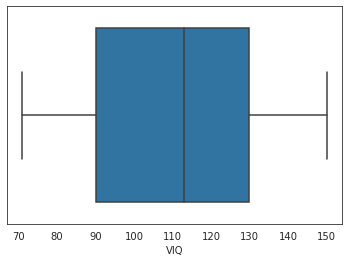

In [5]:
sns.set_style("white")
sns.boxplot(x=VIQ)
None

_Il n'y a pas de valeurs aberrantes dans le jeu de donnée. On observe de nouveau que la médiane est décalée vers la droite._

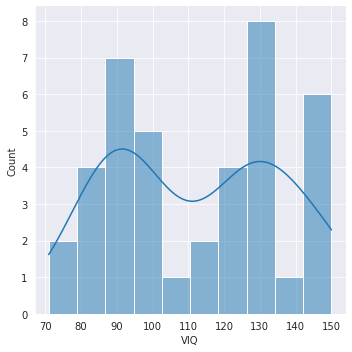

In [6]:
sns.set_style("darkgrid")
sns.displot(x=VIQ, kde=True, bins=10)
None

_Nous avons une distribution bimodale, voire trimodale._

In [7]:
coef_asymetrie = VIQ.skew()
coef_applatissement = VIQ.kurt()

print("Coefficient d'asymétrie:", coef_asymetrie)
print("Coefficient d'applatissement:", coef_applatissement)

Coefficient d'asymétrie: 0.07375447504199074
Coefficient d'applatissement: -1.3698019913383448


_Le coefficient d'asymétrie est légèrement supérieur à 0, ce qui veut dire que la distribution de la variable est décalée vers la gauche et la moyenne est supérieure à la médiane. Par contre, ce n'est pas ce qui est observé lorsqu'on regarde les chiffres, la moyenne est inférieure à la médiane. Quant au coefficient d'applatissement, il est négatif, ce qui veut dire que nous avons une distribution platikurtique (applatie), malgré que sur le diagramme de distribution ce semble être plus ou moins le cas._

## 4. Pour la variable Activity, évaluez les statistiques descriptives et visualisez graphiquement ces statistiques le cas échéant. Interprétez et commentez les résultats

In [8]:
activity_names = df.Activity.unique()
effectifs = df.groupby(by="Activity").agg("size")
frequence = effectifs / effectifs.sum()
print(effectifs)
print("-"*20)
print(frequence)

Activity
artist        8
doctor       12
farmer        7
other         2
professor    11
dtype: int64
--------------------
Activity
artist       0.200
doctor       0.300
farmer       0.175
other        0.050
professor    0.275
dtype: float64


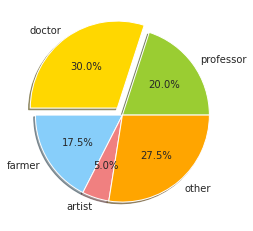

In [9]:
colors = ['yellowgreen', 'gold', 'lightskyblue',
          'lightcoral', 'orange']

plt.pie(effectifs, (0,0.1,0,0,0), labels= activity_names,
       colors = colors, shadow = True, autopct='%1.1f%%')

None

_Il n'est pas nécessaire d'avoir les effectifs/fréquences cumulées puisque nous ne sommes pas dans le cas d'une variable ordinale. Du reste, on peut voir au premier coup d'oeil, grâce au diagramme circulaire, que `doctor` est l'activité dominante, suivie par `other`._

# Exercice 2 : Analyse bivariée des données
## 1. Évaluez les relations entre l’ensemble des variables quantitatives et visualisez ces relations. Interprétez et commentez les résultats.

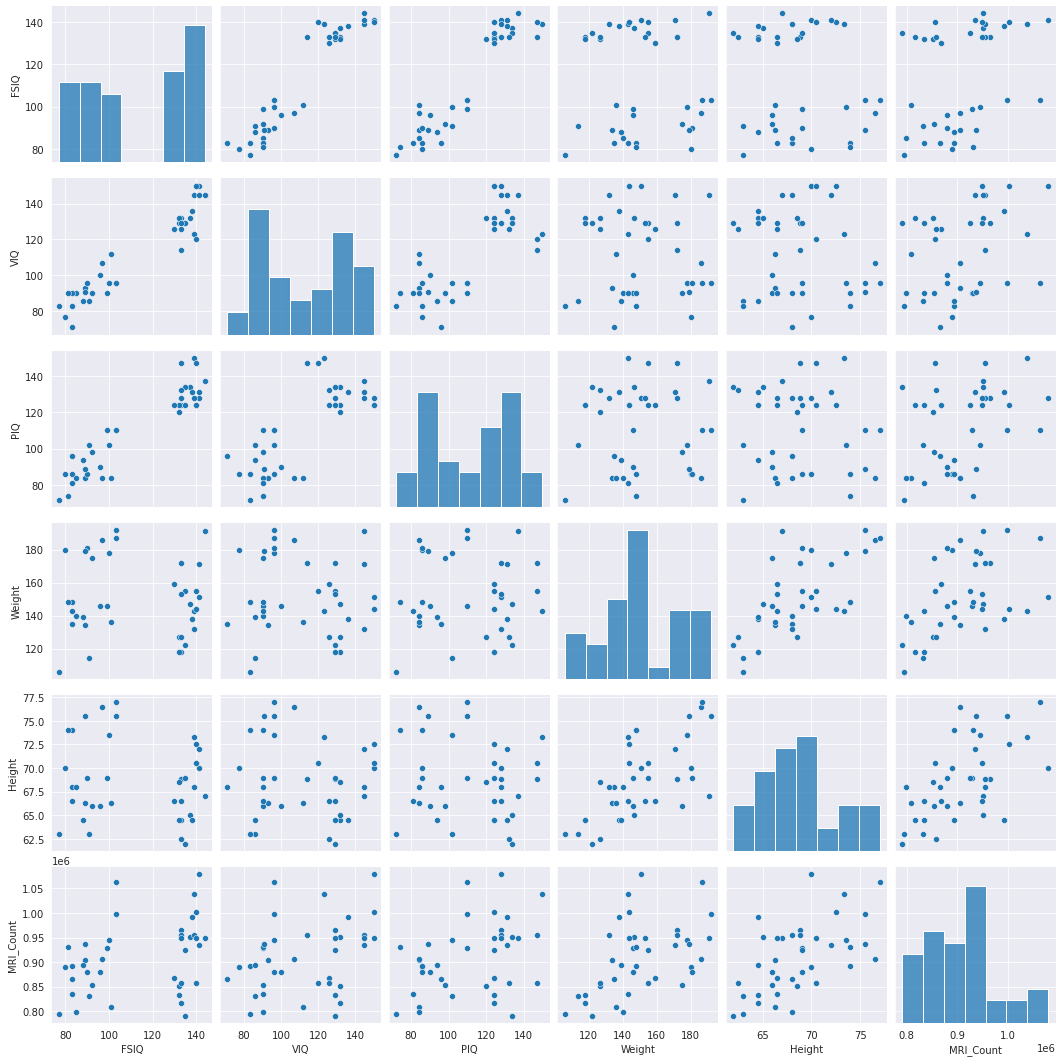

In [10]:
sns.pairplot(df)
None

_Nous avons des diagrammes de dispersion très intéressants! En particulier, nous avons des paires de tests tels que si le score à un test est élevé, alors le score de l'autre test est élevé et vice-versa (forte corrélation). On peut tester cela avec `VIQ` et `FSIQ` (`FSIQ` est aussi très intéressante en raison du fossé entre les deux groupes dans sa distribution). De plus, il y a des paires telles qu'un clustering (2 groupes) se crée assez naturellement. Il serait intéressant de savoir s'il y a une caractéristique expliquant cela. On peut regarder, à tout hasard puisque nous l'avons, le label `Gender`._

In [11]:
display(df[["VIQ", "FSIQ"]].corr())

,VIQ,FSIQ
VIQ,1.000000,0.946639
FSIQ,0.946639,1.000000


_Nous avons en effet une très bonne corrélation entre ces deux variables._

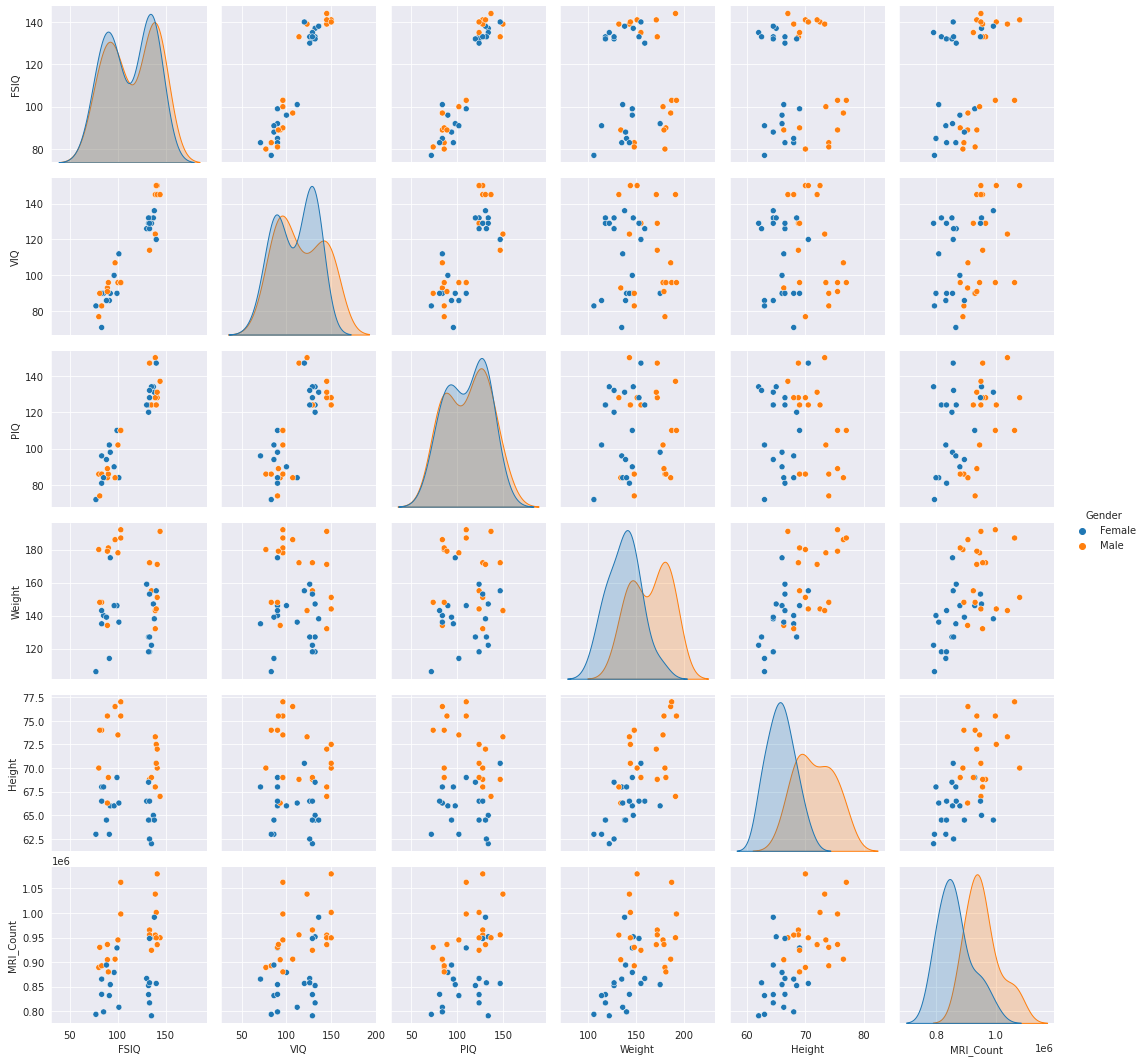

In [12]:
sns.pairplot(df, hue="Gender")
None

_Nous avons beaucoups de variables discriminantes candidates permettants de prédire le sexe d'un individus, mais ce n'est pas en fonction de ses résultats aux tests, mais plutôt en fonction de ses caractéristiques physiques, comme le poids, la taille,etc. Comme on le sait, les hommes sont effectivement en moyenne plus grands que les femmes, et de facto, plus lourds. _

## 2. Pensez-vous que les variables PIQ et FSIQ sont linéairement reliées ? Faites une analyse numérique et une analyse graphique. Interprétez et commentez les résultats.

,PIQ,FSIQ
PIQ,1.000000,0.934125
FSIQ,0.934125,1.000000


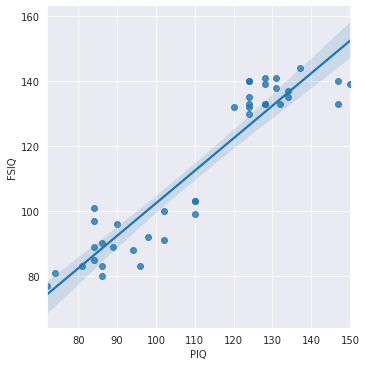

In [13]:
display(df[["PIQ", "FSIQ"]].corr())
sns.lmplot(x="PIQ", y="FSIQ", data=df);
plt.show()
None

_Le coefficient de corrélation est très élevé, ce qui signifie qu'il y a une forte liaison entre les deux variables (`FSIQ` augmente proportionnellement avec `PIQ`). Sur le nuage de points, on peut voir que la droite de régression passe très près de la majorité des points. On peut maintenant regarder le coefficient de détermination pour voir la force du modèle de régression linéaire (la variation expliquée par le modèle)._

In [14]:
model = ols("FSIQ ~ PIQ", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   FSIQ   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     260.2
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           1.37e-18
Time:                        16:20:47   Log-Likelihood:                -142.30
No. Observations:                  40   AIC:                             288.6
Df Residuals:                      38   BIC:                             292.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3034      7.026      0.328      0.7

_Nous avons $R^2 = 0.873$, signifiant qu'il y a une forte corrélation entre les variables._

## 3. Pensez-vous que les variables Activity et FSIQ sont reliées ? Faites une analyse numérique et une analyse graphique. Interprétez et commentez les résultats.

_Il faut faire une analyse de variance (ANOVA)._

In [15]:
model2 = ols("FSIQ ~ Activity", data= df).fit()
rapport_correlation = anova_lm(model2)
display(rapport_correlation)
print(model2.summary())

,df,sum_sq,mean_sq,F,PR(>F)
Activity,4.0,3127.507684,781.876921,1.404061,0.2529
Residual,35.0,19490.392316,556.868352,NaN,NaN


                            OLS Regression Results                            
Dep. Variable:                   FSIQ   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.404
Date:                Thu, 25 Feb 2021   Prob (F-statistic):              0.253
Time:                        16:20:47   Log-Likelihood:                -180.53
No. Observations:                  40   AIC:                             371.1
Df Residuals:                      35   BIC:                             379.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               119.37

_$R^2$ est faible, donc la relation entre les deux variables est très pauvre._

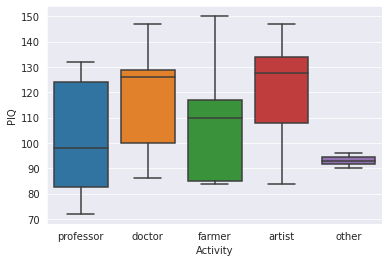

In [16]:
sns.boxplot(x="Activity", y = "PIQ", data = df)
None

_Il y a un bon chevauchement pour ce qui est du résultat au test `PIQ`, ce qui veut dire que la profession n'a pas de lien fort avec le score au test, à l'exception de `other`, mais seulement dans un sens: sachant `other`, on a une bonne idée du résultat, mais sachant le résultat, on ne peut pas dire à quelle profession il appartient._

## 4. Pensez-vous que les variables Activity et Gender sont reliées ? Faites une analyse numérique. Représentez la table de contingence. Interprétez et commentez les résultats.

In [17]:
table = pd.crosstab(df.Activity, df.Gender)
table

Gender,Female,Male
Activity,,
artist,8,0
doctor,1,11
farmer,0,7
other,2,0
professor,9,2


_Pour voir si les variables sont reliées, on va procéder au test du $\chi^2$, mais de prime abord, il semble que oui (la table de contingence est très débalancée)._

In [18]:
results = chi2_contingency(table)

print("Chi square:", results[0])
print("p-value:", results[1])
# print("Degrees of freedom:", results[2]) -- intérêt?

Chi square: 29.78787878787879
p-value: 5.405997743214392e-06


_La valeur de $\chi^2$ est plutôt élevée, donc on ne peut pas dire qu'il n'y a pas de lien entre les deux variables. Du reste, nous avons une $p-value$ qui est de l'ordre de 5 millionnième, ce qui veut dire que le lien est statistiquement significatif._

## Exercice 3 : Inférence statistique

_L'une des hypothèse est un sous-ensemble strict de l'autre hypothèse. En effet, l'hypothèse (`FSIQ` $== 100$) est contenu dans (`FSIQ` $\lt 160$). Donc, si la première est vraie, alors la deuxième l'est, mais l'inverse ne l'est pas nécessairement._

In [24]:
results = ttest_1samp(df["FSIQ"],100)
print("p-value pour mu0 = 100:", results[1])

results = ttest_1samp(df["FSIQ"],160, alternative = "less")
print("p-value pour mu0 >= 160:", results[1])

p-value pour mu0 = 100: 0.0010766792736967715
p-value pour mu0 >= 160: 3.2315442029962524e-15


_Dans les deux cas, on rejette $H_0$ puisque la p-value est plus petite que 0.01. Pour la première hypothèse on peut donc conclure que $\mu \neq \mu_0 \rightarrow \mu \neq 100$, et pour la deuxième, que $\mu \lt \mu_0 \rightarrow \mu \lt 160$, ce que le deuxième chercheur voulait montrer._